# Panorámica
Por David López González  
Repo: [DLG-05 - Pano Gitlab Repo](https://gitlab.com/DLG-05/musi-vcr3-pano/)

Cargamos las librerías necesarias para realizar el proyecto

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

from common import descriptors


Realizamos la carga de las imágenes.
Las imágenes generadas son de una calle de Palma. Contienen puntos en común para que
el sistema sea capaz de localizar los puntos clave y realizar los "matches".
Las fotografías originalmente pesaban alrededor de 15 MB, ya que, están tomadas con una cámara
y se ha reducido su tamaño y la calidad con la herramienta GIMP.

In [2]:
derecha = cv2.imread("../in/descriptors/palma_derecha_reducida.jpg", cv2.IMREAD_COLOR)
izquierda = cv2.imread("../in/descriptors/palma_izquierda_reducida.jpg", cv2.IMREAD_COLOR)

# SIFT

Para la primera ejecución, realizaremos la ejecución con el sistema que se encarga de calcular
los puntos clave y los descriptores de SIFT (sistema de octavas y diferencia de gaussianas).
También calcularemos los puntos coincidentes utilizando una distancia en coma flotante.

In [3]:
kp1, desc1 = descriptors.get_kp_desc(method="sift", img=derecha)
kp2, desc2 = descriptors.get_kp_desc(method="sift", img=izquierda)
matches = descriptors.match_descriptors(method="F", desc1=desc1,
                                        desc2=desc2, k=2)

Filtramos los matches de SIFT mirando la proporción.

In [4]:
matches = descriptors.filter_matches(method="KNN", matches=matches,
                                     proportion=0.7)

Mostramos los matches filtrados en las imágenes.

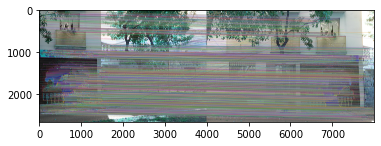

True

In [5]:
res = cv2.drawMatches(derecha, kp1, izquierda, kp2,
                      [m[0] for m in matches], None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(res)
plt.show()
cv2.imwrite("../salida/sift_filtered_matches.jpg", res)

Preparamos los puntos para encontrar la homografía de la imagen de la derecha, para transformarla
y tengan las mismas orientaciones para poder unirlas.

In [6]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
print(len(matches))

for i, match in enumerate(matches):
    points1[i, :] = kp1[match[0].queryIdx].pt
    points2[i, :] = kp2[match[0].trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

4930


La homografía la realizaremos aumentando la longitud de la imagen a la unión de las dos longitudes.

In [7]:
alto, ancho, colors = izquierda.shape
alto_derecha, ancho_derecha, colors_d = derecha.shape
im1_reg = cv2.warpPerspective(derecha,h,(ancho+ancho_derecha,alto))

Realizamos el solapamiento de las imágenes.

In [8]:
destSIFT = np.copy(im1_reg)
destSIFT[0:izquierda.shape[0], 0:izquierda.shape[1], 0:3] = izquierda

Preparamos para mostrar el resultado final.

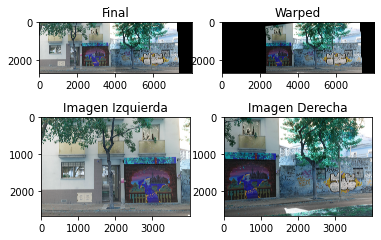

In [9]:
plt.subplot(2, 2, 1)
plt.title("Final")
plt.imshow(destSIFT, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Warped")
plt.imshow(im1_reg, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Imagen Izquierda")
plt.imshow(izquierda, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Imagen Derecha")
plt.imshow(derecha, cmap="gray")
plt.show()

True

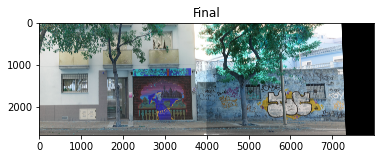

In [10]:
#Pintamos solamente la imagen de SIFT
plt.title("Final")
plt.imshow(destSIFT, cmap="gray")
cv2.imwrite("../salida/sift.jpg", destSIFT)


# SURF

Repetimos el proceso utilizando los descriptores de SURF (SpeededUp Robust Features)
donde intenta reducir el coste computacional de calcular los descriptores de SIFT, mediante
la aplicación de un filtro LOG en cada octava.
También calcularemos los puntos coincidentes utilizando una distancia en coma flotante.

In [11]:
kp1, desc1 = descriptors.get_kp_desc(method="surf", img=derecha)
kp2, desc2 = descriptors.get_kp_desc(method="surf", img=izquierda)
matches = descriptors.match_descriptors(method="F", desc1=desc1,
                                        desc2=desc2, k=2)

Filtramos los matches de SURF mirando la proporción.

In [12]:
matches = descriptors.filter_matches(method="KNN", matches=matches,
                                     proportion=0.7)

Mostramos los matches filtrados en las imágenes.

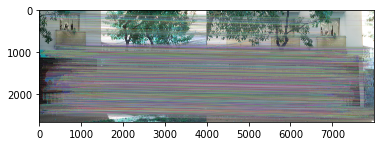

True

In [13]:
res = cv2.drawMatches(derecha, kp1, izquierda, kp2,
                      [m[0] for m in matches], None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(res)
plt.show()
cv2.imwrite("../salida/surf_filtered_matches.jpg", res)

Preparamos los puntos para encontrar la homografía de la imagen de la derecha, para transformarla
y tengan las mismas orientaciones para poder unirlas.

In [14]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
print(len(matches))

for i, match in enumerate(matches):
    points1[i, :] = kp1[match[0].queryIdx].pt
    points2[i, :] = kp2[match[0].trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

6756


La homografía la realizaremos aumentando la longitud de la imagen a la unión de las dos longitudes.

In [15]:
alto, ancho, colors = izquierda.shape
alto_derecha, ancho_derecha, colors_d = derecha.shape
im1_reg = cv2.warpPerspective(derecha,h,(ancho+ancho_derecha,alto))

Realizamos el solapamiento de las imágenes.

In [16]:
destSURF = np.copy(im1_reg)
destSURF[0:izquierda.shape[0], 0:izquierda.shape[1], 0:3] = izquierda

Preparamos para mostrar el resultado final.

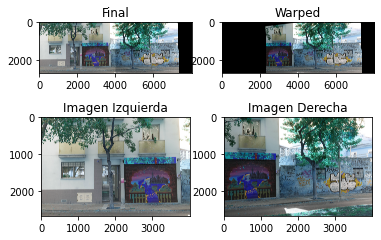

In [17]:
plt.subplot(2, 2, 1)
plt.title("Final")
plt.imshow(destSURF, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Warped")
plt.imshow(im1_reg, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Imagen Izquierda")
plt.imshow(izquierda, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Imagen Derecha")
plt.imshow(derecha, cmap="gray")
plt.show()

True

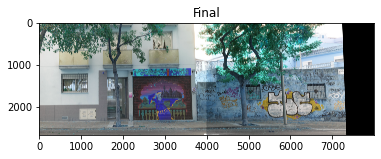

In [18]:
#Pintamos solamente la imagen de SURF
plt.title("Final")
plt.imshow(destSURF, cmap="gray")
cv2.imwrite("../salida/surf.jpg", destSURF)


# ORB
Repetimos el proceso utilizando la alternativa ORB para calcular los puntos claves y los descriptores
A diferencia de SIFT, ORB utiliza una adaptación de BRIEF como descriptor (BRIEF con orientación),
por lo que hay que utilizar todas las herramientas para trabajar con distancias binarias.

In [19]:
kp1, desc1 = descriptors.get_kp_desc(method="O", img=derecha)
kp2, desc2 = descriptors.get_kp_desc(method="O", img=izquierda)
matches = descriptors.match_descriptors(method="D", desc1=desc1,
                                        desc2=desc2)


Filtramos los matches de ORB mirando la distancia
En este caso nos quedaremos con los que están por debajo de una distancia de 55.

In [20]:
matches = descriptors.filter_matches(method="DIST", matches=matches,
                                     min_distance=55)

Mostramos los matches filtrados en las imágenes

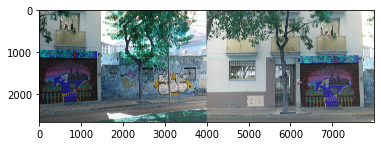

True

In [21]:
res = cv2.drawMatches(derecha, kp1, izquierda, kp2,
                      [m for m in matches], None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(res)
plt.show()
cv2.imwrite("../salida/orb_filtered_matches.jpg", res)

Preparamos los puntos para encontrar la homografía de la imagen de la derecha, para transformarla
y tengan las mismas orientaciones para poder unirlas.
En este caso, el match no es una lista sino un solo elemento.

In [22]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
print(len(matches))

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

22


La homografía la realizaremos aumentando la longitud de la imagen a la unión de las dos longitudes

In [23]:
alto, ancho, colors = izquierda.shape
alto_derecha, ancho_derecha, colors_d = derecha.shape
im1_reg = cv2.warpPerspective(derecha,h,(ancho+ancho_derecha,alto))

Realizamos el solapamiento de las imágenes

In [24]:
destORB = np.copy(im1_reg)
destORB[0:izquierda.shape[0], 0:izquierda.shape[1], 0:3] = izquierda

Preparamos para mostrar el resultado final

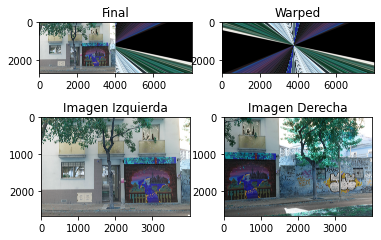

In [25]:
plt.subplot(2, 2, 1)
plt.title("Final")
plt.imshow(destORB, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Warped")
plt.imshow(im1_reg, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Imagen Izquierda")
plt.imshow(izquierda, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Imagen Derecha")
plt.imshow(derecha, cmap="gray")
plt.show()

True

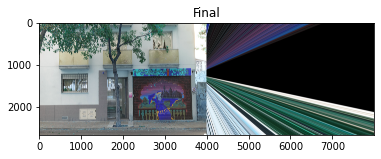

In [26]:
#Pintamos solamente la imagen de ORB
plt.title("Final")
plt.imshow(destORB, cmap="gray")
cv2.imwrite("../salida/orb.jpg", destORB)

En este caso tenemos un mal resultado que comentaremos al final del fichero.

# STAR + BRIEF
Realizaremos una ejecución utilizando **STAR** para calcular los puntos clave y **BRIEF** para calcular los
descriptores, con este sistema no tenemos en cuenta la orientación y como utilizamos BRIEF tenemos que seguir utilizando
el procesamiento con distancias binarias (Hamming).
Utilizamos STAR en este apartado para comprobar el funcionamiento que indican en la documentación de OpenCV.


In [27]:
kp1, desc1 = descriptors.get_kp_desc(method="SB", img=derecha)
kp2, desc2 = descriptors.get_kp_desc(method="SB", img=izquierda)
matches = descriptors.match_descriptors(method="D", desc1=desc1,
                                        desc2=desc2)


Filtramos los matches de BRIEF mirando la distancia.

In [28]:
matches = descriptors.filter_matches(method="DIST", matches=matches,
                                     min_distance=35)

Mostramos los matches filtrados en las imágenes.

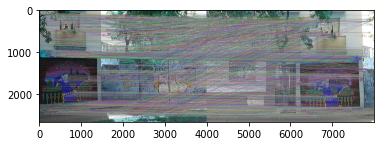

True

In [29]:
res = cv2.drawMatches(derecha, kp1, izquierda, kp2,
                      [m for m in matches], None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(res)
plt.show()
cv2.imwrite("../salida/sb_filtered_matches.jpg", res)

Preparamos los puntos para encontrar la homografía de la imagen de la derecha, para transformarla
y tengan las mismas orientaciones para poder unirlas.

In [30]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
print(len(matches))

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

4221


La homografía la realizaremos aumentando la longitud de la imagen a la unión de las dos longitudes.

In [31]:
alto, ancho, colors = izquierda.shape
alto_derecha, ancho_derecha, colors_d = derecha.shape
im1_reg = cv2.warpPerspective(derecha,h,(ancho+ancho_derecha,alto))

Realizamos el solapamiento de las imágenes.

In [32]:
destSB = np.copy(im1_reg)
destSB[0:izquierda.shape[0], 0:izquierda.shape[1], 0:3] = izquierda

Preparamos para mostrar el resultado final.

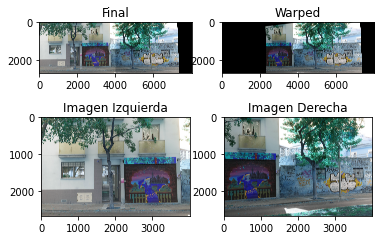

In [33]:
plt.subplot(2, 2, 1)
plt.title("Final")
plt.imshow(destSB, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Warped")
plt.imshow(im1_reg, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Imagen Izquierda")
plt.imshow(izquierda, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Imagen Derecha")
plt.imshow(derecha, cmap="gray")
plt.show()

True

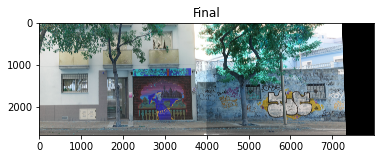

In [34]:
#Pintamos solamente la imagen de STAR + BRIEF
plt.title("Final")
plt.imshow(destSB, cmap="gray")
cv2.imwrite("../salida/sb.jpg", destSB)


# FAST + BRIEF
Finalmente realizaremos una ejecución utilizando **FAST** para calcular los puntos clave y **BRIEF** para calcular los
descriptores, con este sistema no tenemos en cuenta la orientación y como utilizamos BRIEF tenemos que seguir utilizando
el procesamiento con distancias binarias (Hamming).


In [35]:
kp1, desc1 = descriptors.get_kp_desc(method="FB", img=derecha)
kp2, desc2 = descriptors.get_kp_desc(method="FB", img=izquierda)
matches = descriptors.match_descriptors(method="D", desc1=desc1,
                                        desc2=desc2)


Filtramos los matches de BRIEF mirando la distancia.

In [36]:
matches = descriptors.filter_matches(method="DIST", matches=matches,
                                     min_distance=35)

Mostramos los matches filtrados en las imágenes.

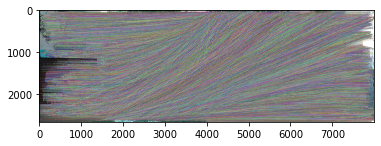

True

In [37]:
res = cv2.drawMatches(derecha, kp1, izquierda, kp2,
                      [m for m in matches], None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(res)
plt.show()
cv2.imwrite("../salida/fb_filtered_matches.jpg", res)

Preparamos los puntos para encontrar la homografía de la imagen de la derecha, para transformarla
y tengan las mismas orientaciones para poder unirlas.

In [38]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
print(len(matches))

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

70063


La homografía la realizaremos aumentando la longitud de la imagen a la unión de las dos longitudes.

In [39]:
alto, ancho, colors = izquierda.shape
alto_derecha, ancho_derecha, colors_d = derecha.shape
im1_reg = cv2.warpPerspective(derecha,h,(ancho+ancho_derecha,alto))

Realizamos el solapamiento de las imágenes.

In [40]:
destFB = np.copy(im1_reg)
destFB[0:izquierda.shape[0], 0:izquierda.shape[1], 0:3] = izquierda

Preparamos para mostrar el resultado final.

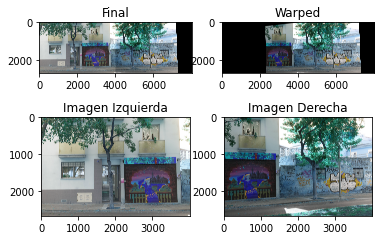

In [41]:
plt.subplot(2, 2, 1)
plt.title("Final")
plt.imshow(destFB, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Warped")
plt.imshow(im1_reg, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Imagen Izquierda")
plt.imshow(izquierda, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Imagen Derecha")
plt.imshow(derecha, cmap="gray")
plt.show()

True

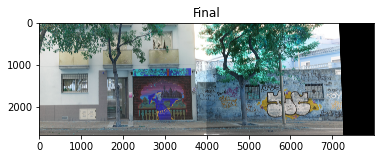

In [42]:
#Pintamos solamente la imagen de Fast + BRIEF
plt.title("Final")
plt.imshow(destFB, cmap="gray")
cv2.imwrite("../salida/fb.jpg", destFB)

# Comparación
Finalmente realizamos una comparación visual de los 3 resultados obtenidos.


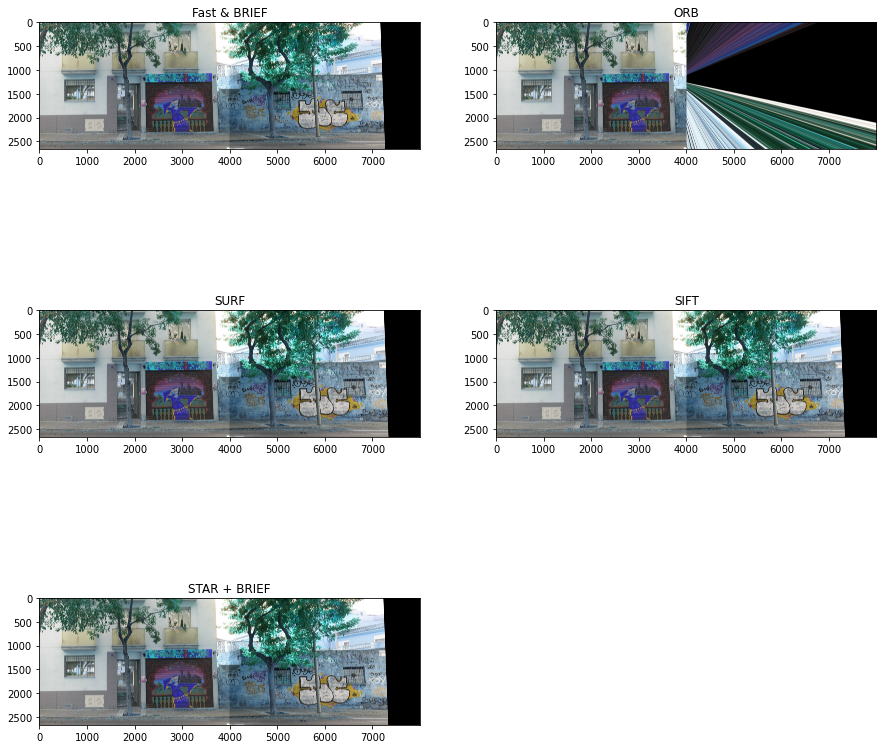

In [43]:
fig=plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.title("Fast & BRIEF")
plt.imshow(destFB, cmap="gray")

plt.subplot(3, 2, 2)
plt.title("ORB")
plt.imshow(destORB, cmap="gray")

plt.subplot(3, 2, 3)
plt.title("SURF")
plt.imshow(destSURF, cmap="gray")

plt.subplot(3, 2, 4)
plt.title("SIFT")
plt.imshow(destSIFT, cmap="gray")

plt.subplot(3, 2, 5)
plt.title("STAR + BRIEF")
plt.imshow(destSB, cmap="gray")

## SIFT
![Filtered matches sift](img/sift_filtered_matches.jpg "Filtered matches sift")
![sift](img/sift.jpg "sift")

## SIFT
![Filtered matches surf](img/surf_filtered_matches.jpg "Filtered matches surf")
![surf](img/surf.jpg "surf")

## ORB
![Filtered matches orb](img/orb_filtered_matches.jpg "Filtered matches ORB")
![orb](img/orb.jpg "orb")

## STAR + BRIEF
![Filtered matches sb](img/sb_filtered_matches.jpg "Filtered matches SB")
![sb](img/sb.jpg "sb")

## FAST + BRIEF
![Filtered matches fb](img/fb_filtered_matches.jpg "Filtered matches FB")
![fb](img/fb.jpg "fb")

Como vemos, la imagen utilizando el algoritmo de ORB no ha conseguido realizar la panorámica.
Esto es debido a que al generar los matches confunde los árboles de ambas imágenes (nosotros sabemos 
que son diferentes) porque el programa no consigue diferenciarlos. También vemos que hay puntos clave
como la lámpara de la fachada que lo consigue identificar bien, pero por ejemplo toda
la puerta con el dibujo no realiza ningún match.

El resultado de SIFT es bueno aunque el algoritmo es extremadamente lento. Se intentó
ejecutar la misma imagen sin comprimir y el algoritmo estuvo aproximadamente 15 minutos
para obtener los matches sin filtrar.

El resultado de SURF es muy similar al de SIFT con un tiempo ligeramente menor.

Tanto SIFT y SURF consiguen diferenciar bastante bien que los 2 árboles no son los mismos a la hora de generar los
matches, mientras que ORB los confunde y STAR - FAST + BRIEF también los confunde, pero al tener más puntos de
referencia, a la hora de calcular la homografía realiza una aproximación por mínimos cuadrados.

El resultado que tenemos con STAR + BRIEF en este caso es muy similar al que tenemos con SIFT
pero con un tiempo infinitamente menor, que puede ser mas útil para llevarlo a la práctica.

El de Fast + BRIEF el resultado también es parecido al de SIFT y SURF pero al detectar bastante más 
puntos que con STAR + BRIEF es más lento que el STAR + BRIEF.

También como curiosidad con la imagen seleccionada la parte superior de la unión (donde está la
parte de la fachada que hace como una forma de una flor), ninguno de los 3 sistemas que han
conseguido dar una solución han sido capaces de realizar una unión perfecta.

